In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,RepeatVector
from keras.layers import Bidirectional
from keras.layers import Flatten,Conv1D, MaxPooling1D
from keras.utils import plot_model


plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('testset.csv')

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
df.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [5]:
df.shape

(100990, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [7]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [8]:
df.dtypes.value_counts()

float64    11
int64       6
object      3
dtype: int64

In [9]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


<AxesSubplot:>

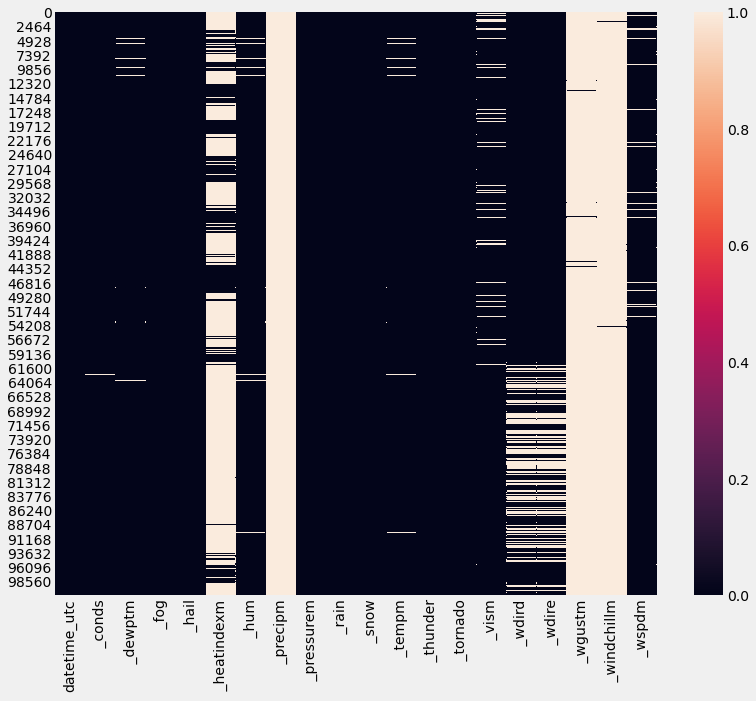

In [10]:
plt.figure(figsize = (12,10))
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [12]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [13]:
df['datetime_utc'].dtype

dtype('O')

In [14]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [15]:
df[' _tempm'].fillna(df[' _tempm'].mean(),inplace = True)

In [16]:
df[' _tempm'].isnull().sum()

0

In [17]:
data= pd.DataFrame(list(df[' _tempm']), index = df['datetime_utc'], columns=['temp'])

In [18]:
data.sample(10)

,temp
datetime_utc,
2001-03-21 21:30:00,20.0
2000-10-05 07:30:00,35.0
1999-06-13 06:30:00,37.0
2003-08-19 03:00:00,29.0
1998-06-09 12:30:00,38.0
1999-11-07 08:30:00,30.0
2004-01-20 00:00:00,11.0
2011-06-10 06:30:00,31.0
1999-06-11 08:30:00,39.0


In [19]:
# resampling data with data frequency for time series forecasting
data = data.resample('D').mean()

In [20]:
data.temp.isnull().sum()

141

In [21]:
data.fillna(data['temp'].mean(),inplace=True)

In [22]:
data.isnull().sum()

temp    0
dtype: int64

In [23]:
data.shape

(7480, 1)

Text(0.5, 1.0, 'Time Series of Temp against Years')

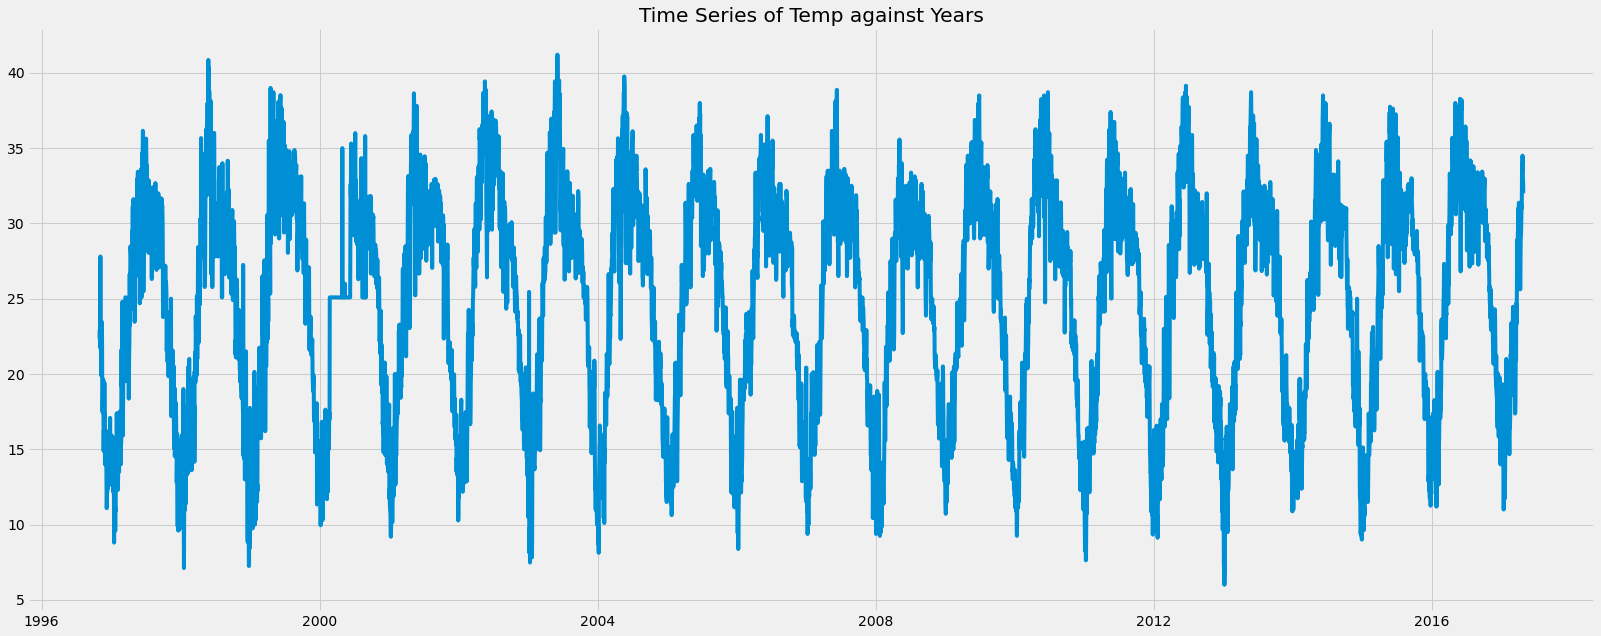

In [24]:
plt.figure(figsize= (25,10))
plt.plot(data)
plt.title('Time Series of Temp against Years')

In [25]:
sc = MinMaxScaler(feature_range=(-1,1))
data = sc.fit_transform(data)

In [26]:
data

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [27]:
data.shape

(7480, 1)

In [28]:
look_back = 30
dataX,dataY = [], []
for i in range(len(data)-(look_back)):
    dataX.append(data[i:i+look_back])
    dataY.append(data[i+look_back])

In [29]:
dataX = np.asanyarray(dataX)
dataY = np.asanyarray(dataY)

In [30]:
xtrain = dataX[:7300,:,:]
xtest = dataX[7300:,:,:]
ytrain = dataY[:7300]
ytest = dataY[7300:]

In [31]:
xtrain.shape, ytrain.shape

((7300, 30, 1), (7300, 1))

In [32]:
xtest.shape,ytest.shape

((150, 30, 1), (150, 1))

CNN-LSTM Model

In [33]:
model = Sequential()
model.add(Conv1D(filters =256,kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2,activation='relu', input_shape=(30,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

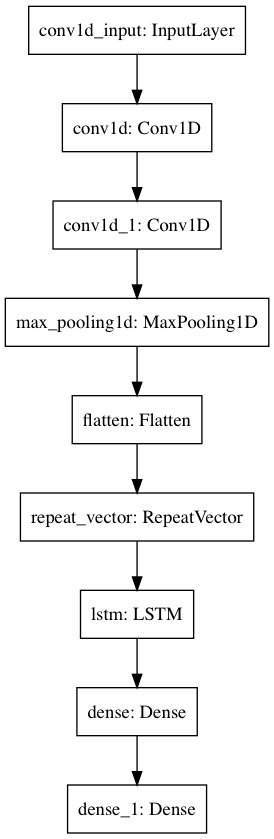

In [34]:
plot_model(model, to_file='model_plot.png')

In [36]:
history = model.fit(xtrain,ytrain,epochs=500,verbose=1)

Epoch 1/500
229/229 [==============================] - 39s 170ms/step - loss: 0.0174
Epoch 2/500
229/229 [==============================] - 38s 165ms/step - loss: 0.0112
Epoch 3/500
229/229 [==============================] - 38s 164ms/step - loss: 0.0104
Epoch 4/500
229/229 [==============================] - 38s 165ms/step - loss: 0.0101
Epoch 5/500
229/229 [==============================] - 38s 165ms/step - loss: 0.0103
Epoch 6/500
229/229 [==============================] - 38s 164ms/step - loss: 0.0100
Epoch 7/500
229/229 [==============================] - 38s 167ms/step - loss: 0.0094
Epoch 8/500
229/229 [==============================] - 39s 170ms/step - loss: 0.0096
Epoch 9/500
229/229 [==============================] - 39s 171ms/step - loss: 0.0093
Epoch 10/500
229/229 [==============================] - 39s 172ms/step - loss: 0.0092
Epoch 11/500
229/229 [==============================] - 38s 166ms/step - loss: 0.0092
Epoch 12/500
229/229 [==============================] - 37s 163

229/229 [==============================] - 37s 164ms/step - loss: 5.8453e-04
Epoch 96/500
229/229 [==============================] - 37s 163ms/step - loss: 6.2170e-04
Epoch 97/500
229/229 [==============================] - 37s 163ms/step - loss: 5.9150e-04
Epoch 98/500
229/229 [==============================] - 37s 163ms/step - loss: 5.4159e-04
Epoch 99/500
229/229 [==============================] - 37s 163ms/step - loss: 4.7444e-04
Epoch 100/500
229/229 [==============================] - 37s 163ms/step - loss: 4.7895e-04
Epoch 101/500
229/229 [==============================] - 37s 164ms/step - loss: 4.9220e-04
Epoch 102/500
229/229 [==============================] - 37s 164ms/step - loss: 5.6227e-04
Epoch 103/500
229/229 [==============================] - 37s 164ms/step - loss: 5.5784e-04
Epoch 104/500
229/229 [==============================] - 37s 163ms/step - loss: 7.0164e-04
Epoch 105/500
229/229 [==============================] - 37s 163ms/step - loss: 5.6981e-04
Epoch 106/500
229

229/229 [==============================] - 40s 176ms/step - loss: 2.8530e-04
Epoch 186/500
229/229 [==============================] - 43s 189ms/step - loss: 2.4771e-04
Epoch 187/500
229/229 [==============================] - 41s 179ms/step - loss: 2.3219e-04
Epoch 188/500
229/229 [==============================] - 40s 175ms/step - loss: 2.1203e-04
Epoch 189/500
229/229 [==============================] - 42s 185ms/step - loss: 2.0496e-04
Epoch 190/500
229/229 [==============================] - 37s 161ms/step - loss: 2.2323e-04
Epoch 191/500
229/229 [==============================] - 40s 177ms/step - loss: 2.7598e-04
Epoch 192/500
229/229 [==============================] - 39s 171ms/step - loss: 2.7601e-04
Epoch 193/500
229/229 [==============================] - 39s 168ms/step - loss: 2.8899e-04
Epoch 194/500
229/229 [==============================] - 38s 164ms/step - loss: 2.7842e-04
Epoch 195/500
229/229 [==============================] - 37s 162ms/step - loss: 2.0450e-04
Epoch 196/500

229/229 [==============================] - 42s 182ms/step - loss: 1.5922e-04
Epoch 276/500
229/229 [==============================] - 46s 203ms/step - loss: 2.0416e-04
Epoch 277/500
229/229 [==============================] - 40s 174ms/step - loss: 1.8570e-04
Epoch 278/500
229/229 [==============================] - 42s 182ms/step - loss: 1.7653e-04
Epoch 279/500
229/229 [==============================] - 41s 177ms/step - loss: 1.5438e-04
Epoch 280/500
229/229 [==============================] - 40s 177ms/step - loss: 1.5284e-04
Epoch 281/500
229/229 [==============================] - 39s 169ms/step - loss: 1.9782e-04
Epoch 282/500
229/229 [==============================] - 44s 190ms/step - loss: 2.1448e-04
Epoch 283/500
229/229 [==============================] - 47s 206ms/step - loss: 3.4879e-04
Epoch 284/500
229/229 [==============================] - 42s 184ms/step - loss: 1.9365e-04
Epoch 285/500
229/229 [==============================] - 49s 214ms/step - loss: 1.3753e-04
Epoch 286/500

229/229 [==============================] - 38s 167ms/step - loss: 8.6079e-05
Epoch 366/500
229/229 [==============================] - 39s 172ms/step - loss: 9.0630e-05
Epoch 367/500
229/229 [==============================] - 38s 168ms/step - loss: 1.1954e-04
Epoch 368/500
229/229 [==============================] - 39s 171ms/step - loss: 1.2550e-04
Epoch 369/500
229/229 [==============================] - 39s 170ms/step - loss: 1.5041e-04
Epoch 370/500
229/229 [==============================] - 39s 172ms/step - loss: 2.5829e-04
Epoch 371/500
229/229 [==============================] - 39s 171ms/step - loss: 2.3936e-04
Epoch 372/500
229/229 [==============================] - 39s 172ms/step - loss: 1.5930e-04
Epoch 373/500
229/229 [==============================] - 39s 170ms/step - loss: 1.1017e-04
Epoch 374/500
229/229 [==============================] - 38s 167ms/step - loss: 9.3590e-05
Epoch 375/500
229/229 [==============================] - 39s 171ms/step - loss: 9.1162e-05
Epoch 376/500

229/229 [==============================] - 38s 165ms/step - loss: 1.1491e-04
Epoch 456/500
229/229 [==============================] - 37s 163ms/step - loss: 1.2118e-04
Epoch 457/500
229/229 [==============================] - 36s 159ms/step - loss: 1.1601e-04
Epoch 458/500
229/229 [==============================] - 37s 161ms/step - loss: 1.1083e-04
Epoch 459/500
229/229 [==============================] - 37s 161ms/step - loss: 1.0904e-04
Epoch 460/500
229/229 [==============================] - 37s 161ms/step - loss: 1.0077e-04
Epoch 461/500
229/229 [==============================] - 37s 162ms/step - loss: 1.2640e-04
Epoch 462/500
229/229 [==============================] - 37s 162ms/step - loss: 1.1584e-04
Epoch 463/500
229/229 [==============================] - 38s 164ms/step - loss: 1.3203e-04
Epoch 464/500
229/229 [==============================] - 37s 164ms/step - loss: 1.1546e-04
Epoch 465/500
229/229 [==============================] - 37s 162ms/step - loss: 9.8681e-05
Epoch 466/500

In [37]:
pred = model.predict(xtest)
pred = sc.inverse_transform(pred)

In [ ]:
model.save('.')

In [38]:
pred[:10]

array([[21.55838 ],
       [23.88702 ],
       [23.247236],
       [22.673496],
       [21.426334],
       [20.168768],
       [18.696173],
       [20.519094],
       [19.13815 ],
       [18.424603]], dtype=float32)

In [39]:
ytest = sc.inverse_transform(ytest)


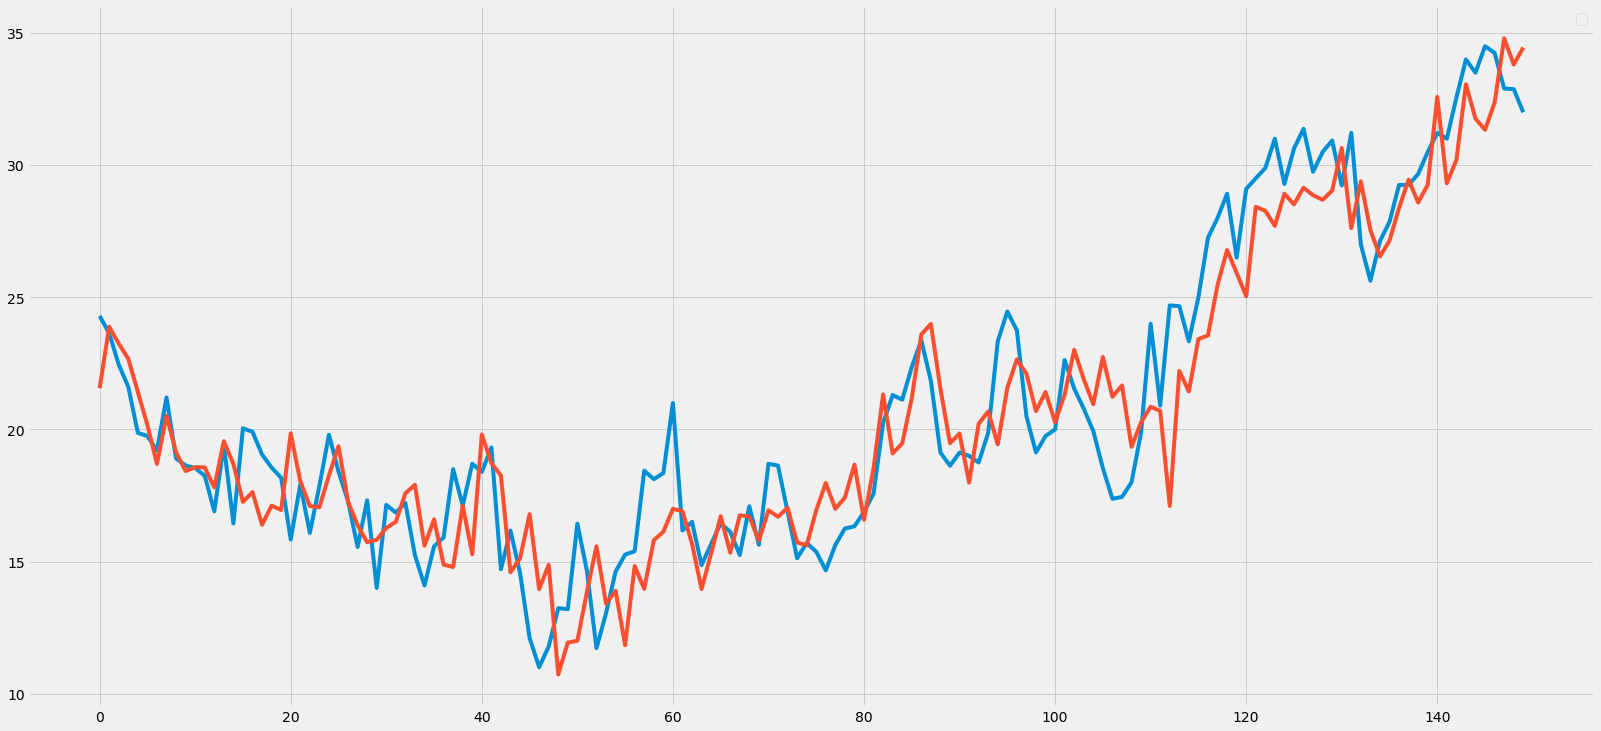

In [41]:
plt.figure(figsize = (25,12))
plt.plot(ytest)
plt.plot(pred)
plt.legend('Test', 'Predicted')
plt.show()